<a href="https://colab.research.google.com/github/RIZKYANGKATA/MACHLEARN/blob/main/UTS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
Anggota Kelompok :

1. Alfan Farchi (07)

2. Arhan Windu (10)

3. Kurniawati Agustina (15)

4. Rizky Angkata (25)

5. Tarista Dwi (27)

Kelas : TI-3A

UTS PEMBELAJARAN MESIN
***

**Import Library**

In [ ]:
import os
import cv2
import random
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

**Fungsi Menampilkan Citra**

In [ ]:
# Fungsi untuk menampilkan citra
def show_images(images, titles, figsize=(15, 7)):
    plt.figure(figsize=figsize)
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

*Kode tersebut mendefinisikan sebuah fungsi bernama show images yang digunakan untuk menampilkan sejumlah citra dalam satu jendela tampilan. Fungsi ini menerima dua parameter: images (daftar citra) dan titles (daftar judul yang berkorespondensi dengan masing-masing citra). Dalam penggunaannya, fungsi ini membuat jendela tampilan dengan ukuran yang dapat disesuaikan, menampilkan setiap citra dalam bentuk subplot dengan judul yang sesuai di atasnya, dan menonaktifkan sumbu koordinat. Hasilnya adalah tampilan citra-citra tersebut dalam satu jendela dengan judul-judul yang disertakan.*

**Model K-Means**

In [ ]:
def kmeans_segmentation(image, k):
    # Jika citra berwarna
    if len(image.shape) == 3:
        pixels = image.reshape((-1, 3))
    # Jika citra grayscale
    elif len(image.shape) == 2:
        pixels = image.reshape((-1, 1))
    else:
        raise ValueError("Bentuk citra tidak didukung")

    kmeans = KMeans(n_clusters=k, n_init=100)
    kmeans.fit(pixels)

    # Gunakan dimensi citra asli
    segmented_image = kmeans.labels_.reshape(image.shape[:2])
    return segmented_image

*Kode tersebut adalah sebuah fungsi kmeans_segmentesion yang digunakan untuk melakukan segmentasi citra dengan algoritma K-Means Clustering. Fungsi ini menerima citra image dan jumlah kluster k sebagai input. Pertama, citra dikonversi ke dalam format piksel tunggal jika berwarna atau grayscale. Kemudian, algoritma K-Means diterapkan dengan k kluster dan hasil segmentasi diterapkan pada citra asli. Hasil segmentasi citra kemudian dikembalikan sebagai output fungsi. Ini adalah alat yang praktis untuk segmentasi citra berdasarkan jumlah kluster yang diinginkan.*

**Pembacaan Data Citra**

In [ ]:
# Direktori dataset
dataset_dir = '/content/drive/MyDrive/ML/UTS'

# Pilih 5 citra plat nomor secara acak dari seluruh dataset
all_image_files = []
for root, dirs, files in os.walk(dataset_dir):
    all_image_files.extend([os.path.join(root, file) for file in files])

# Pilih secara acak 5 citra plat nomor
selected_images = random.sample(all_image_files, 5)

*Kode tersebut bertujuan untuk memilih secara acak 5 citra plat nomor dari sebuah direktori dataset. Pertama, direktori dataset ditentukan dalam variabel dataset_dir. Kemudian, kode menggunakan os.walk untuk mengumpulkan semua jalur file gambar plat nomor dari direktori tersebut ke dalam all_image_files. Akhirnya, 5 gambar plat nomor dipilih secara acak dari daftar jalur tersebut dan disimpan dalam variabel selected_image. Kode ini mempermudah pemilihan acak dari dataset gambar plat nomor.*

**Cetak Data Citra**

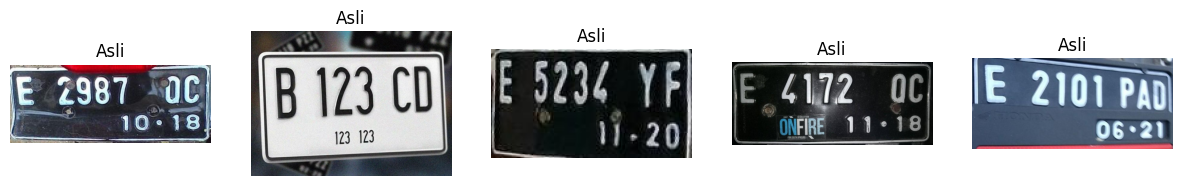

In [ ]:
# Muat dan tampilkan citra-citra yang dipilih sebelum segmentasi
original_images = [cv2.imread(img) for img in selected_images]

# Menampilkan citra asli dengan judul "Original" (dalam format RGB)
fig, axes = plt.subplots(1, len(original_images), figsize=(15, 5))
for ax, image in zip(axes, original_images):
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax.imshow(rgb_image)
    ax.set_title('Asli')
    ax.axis('off')
plt.show()

*Kode tersebut digunakan untuk memuat dan menampilkan citra-citra yang telah dipilih sebelum dilakukan segmentasi. Citra-citra asli yang dipilih dimuat dan ditampilkan dalam satu jendela tampilan dengan judul "Asli". Kode ini memudahkan pengguna untuk memeriksa citra-citra sebelum melakukan proses segmentasi.*

**Pre-Processing**

In [ ]:
# Pra-pemrosesan: Merubah color space menjadi grayscale
grayscale_images = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in original_images]

# Pra-pemrosesan: Reduksi dimensi menggunakan PCA
pca = PCA(n_components=3)
reduced_images = [pca.fit_transform(img.reshape((-1, 3))).reshape(img.shape) for img in original_images]

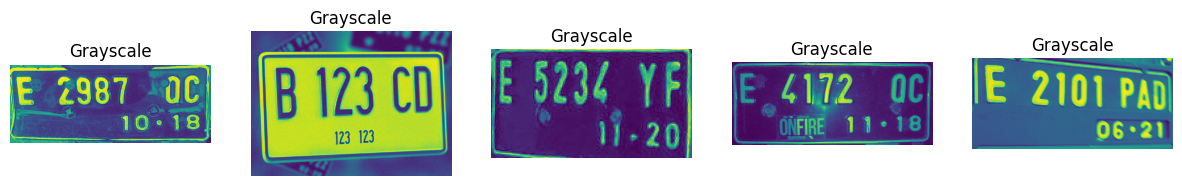

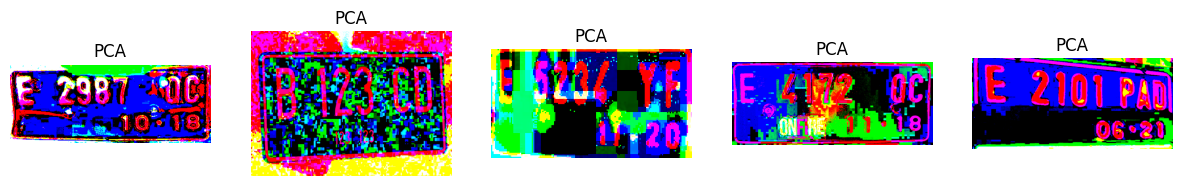

In [ ]:
show_images(grayscale_images, titles=['Grayscale']*len(grayscale_images))
show_images(reduced_images, titles=['PCA']*len(reduced_images))

*Kode tersebut adalah tahap pra-pemrosesan pada citra. Pertama, citra-citra asli diubah menjadi citra grayscale. Kemudian, dilakukan reduksi dimensi dengan menggunakan PCA, mengubah citra-citra menjadi citra tiga dimensi utama. Hasil pra-pemrosesan ini ditampilkan dalam dua tahap, pertama sebagai citra grayscale dan kedua sebagai citra dengan tiga komponen utama PCA. Tahap pra-pemrosesan ini mempersiapkan citra-citra untuk tahap selanjutnya dalam analisis atau pemrosesan.*

**Proses Segmentasi**

In [ ]:
# Lakukan segmentasi pada citra-citra yang telah di-preprocess
segmented_images_gray = [kmeans_segmentation(img, 2) for img in grayscale_images]

In [ ]:
# Lakukan segmentasi pada citra-citra yang telah di-preprocess
segmented_images_pca = [kmeans_segmentation(img, 2) for img in reduced_images]

*Kode tersebut melakukan segmentasi pada citra-citra yang telah diproses sebelumnya dalam dua tahap berbeda. Pertama, segmentasi dilakukan pada citra-citra grayscale yang telah dihasilkan dalam tahap pra-pemrosesan sebelumnya. Kemudian, segmentasi juga dilakukan pada citra-citra yang telah direduksi dimensinya dengan PCA. Dalam kedua tahap segmentasi, algoritma K-Means Clustering digunakan dengan 2 kluster sebagai parameter. Hasil segmentasi dari kedua tahap ini disimpan dalam dua variabel terpisah, yaitu segmented_images_gray untuk citra-citra grayscale yang telah disegmentasi, dan segmented_images_pca untuk citra-citra yang telah direduksi dimensinya dengan PCA yang juga telah disegmentasi. Kode ini merupakan langkah penting dalam analisis citra, yang memungkinkan untuk mengidentifikasi kelompok piksel-piksel yang serupa dalam citra dengan tujuan analisis lebih lanjut atau pengolahan lanjutan.*

**Hasil Segementasi**

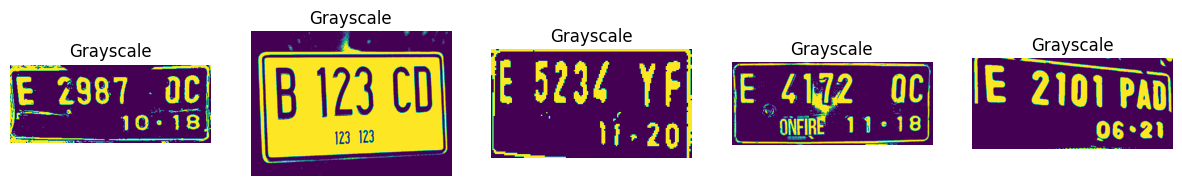

In [ ]:
# Tampilkan perbandingan citra sebelum dan sesudah segmentasi
show_images(segmented_images_gray,['Grayscale']*len(segmented_images_gray))

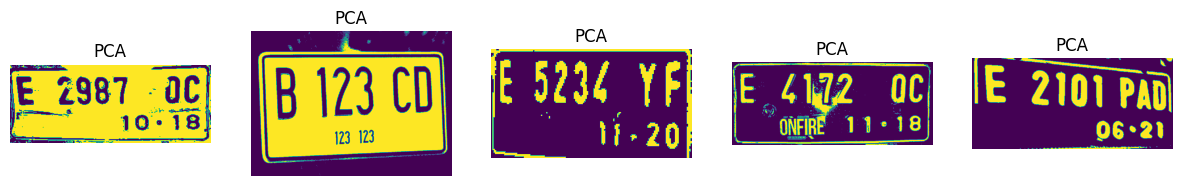

In [ ]:
# Tampilkan perbandingan citra sebelum dan sesudah segmentasi
show_images(segmented_images_pca,['PCA']*len(segmented_images_pca))

*Kode tersebut bertujuan untuk menampilkan perbandingan citra sebelum dan sesudah proses segmentasi pada citra-citra grayscale yang telah diolah sebelumnya. Citra-citra setelah proses segmentasi, yang disimpan dalam variabel segmented_images_gray, ditampilkan menggunakan fungsi show_images dengan judul "Grayscale." Hasil ini memungkinkan pengguna untuk membandingkan citra-citra asli dalam format grayscale dengan citra-citra yang telah mengalami segmentasi. Hal ini berguna dalam memahami efek dari proses segmentasi terhadap citra dan mengidentifikasi kelompok piksel yang serupa yang mungkin telah terbentuk setelah segmentasi.*